In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import wrangle
import explore

import warnings
warnings.filterwarnings('ignore')

In [34]:
# set style defaults
plt.rc('figure', figsize=(20, 8))
# plt.style.use('seaborn-darkgrid')

In [4]:
# change setting to view all columns in jupyter notebook
pd.set_option('display.max_columns', None)

# Sound The Alarm Project Goal

With over two million recorded wildfires and over 164 million acres burned, human intervention is needed to reduce the devastation and destruction caused by wildfires. Our overall goal is to see how US wildfires have changed over the years to promote active solutions to reduce their impact.

## Acquire & Prepare

The team and I already did some cleaning and preparation of the data with those steps in our wrangle file but there are some additional things I want to do to aid with exploration.

In [5]:
# use a function to pull in the data
fires = wrangle.wrangle_fires()
fires.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,101676000.0,west,1.008831e+09,small
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,101676000.0,west,1.008831e+09,small
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA,101676000.0,west,1.008831e+09,small
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA,101676000.0,west,1.008831e+09,small
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA,101676000.0,west,1.008831e+09,small


In [5]:
# check info
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166753 entries, 0 to 2166752
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   fire_year         int64         
 1   discovery_date    datetime64[ns]
 2   general_cause     object        
 3   containment_date  datetime64[ns]
 4   fire_size         float64       
 5   latitude          float64       
 6   longitude         float64       
 7   state             object        
 8   state_size        float64       
 9   region            object        
 10  region_size       float64       
 11  fire_size_cat     object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 214.9+ MB


In [7]:
# set discovery date as index
df = fires.set_index('discovery_date').sort_index()
df.head(2)

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat
discovery_date,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small


In [8]:
# create a month column
df['month'] = df.index.month_name()
df.head(2)

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,month
discovery_date,,,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,37745000.0,southeast,3.670760e+08,small,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,62604000.0,west,1.008831e+09,small,January


## Univariate Analysis

In [9]:
# check oldest and newest discovery dates in the dataset
print(df.index.min(), df.index.max())

1992-01-01 00:00:00 2018-12-31 00:00:00


### We have 27 years of data, all of 1992 through to the end of 2018.

In [10]:
# check value counts for fire year
df.fire_year.value_counts()

2006    117943
2011     98904
2007     98837
2000     96397
2005     92921
1999     89350
2008     88306
2001     87001
2010     85579
2017     82279
2016     81994
2009     81492
2018     80863
2015     77275
2002     76128
1994     75932
1996     75561
2012     74258
1995     71440
2014     70480
2004     69370
1998     68356
2003     68275
1992     67961
2013     66434
1993     61975
1997     61442
Name: fire_year, dtype: int64

### Just with a quick value counts, it almost seems like the number of wildfires per year is increasing. Granted we do have more "20.." years in our dataset but most of the 1990s are listed toward the bottom of this list.

In [11]:
# check counts for each cause
df.general_cause.value_counts()

Missing data/not specified/undetermined       547438
Debris and open burning                       507219
Natural                                       312807
Arson/incendiarism                            310320
Equipment and vehicle use                     175824
Recreation and ceremony                        92725
Misuse of fire by a minor                      64630
Smoking                                        61689
Railroad operations and maintenance            36437
Power generation/transmission/distribution     28491
Fireworks                                      17205
Other causes                                    9763
Firearms and explosives use                     2205
Name: general_cause, dtype: int64

### It looks like almost quarter of our data has no specified cause. The top specified cause is debris/open burning followed by natural causes. It appears human action causes more fires than natural events.

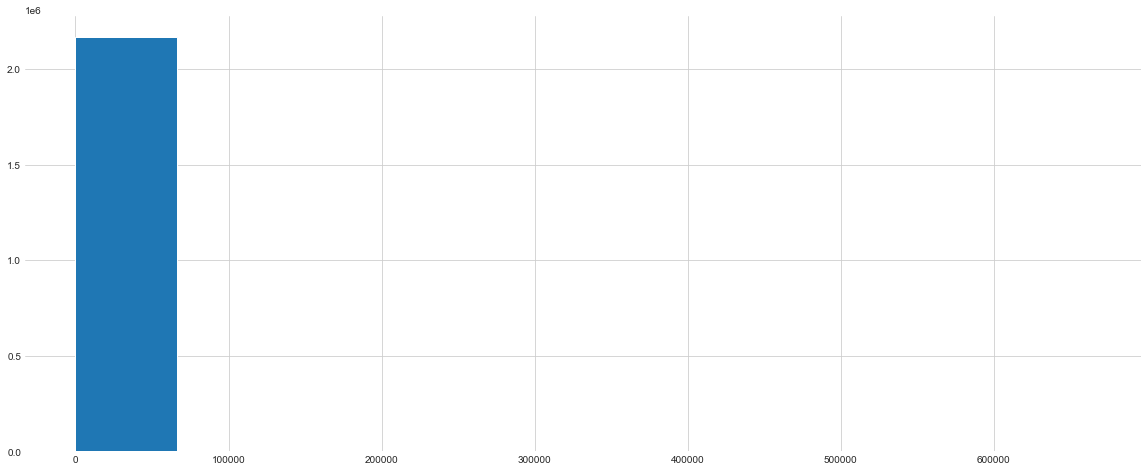

In [36]:
# plot fire size
df.fire_size.hist();

In [13]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

In [14]:
# check average fire size
df.fire_size.mean()

75.99039753419058

### The data contains some outliers when it comes to fire size. There is a significant difference between the 75th percentile of 3 acres and the max of ~660k acres. I would probably avoid using average fire size as a descriptor because of the skew caused by these outliers.

### During our preparation of the data, we did some feature engineering and categorized the fire size as either small or large. We based this on the National Wildfire Coordinating Group (NWCG) size class (listed below) but simplified it and used just two categories with their Class G as our "large" fires and anything under that as "small".

* Class A - one-fourth acre or less;
* Class B - more than one-fourth acre, but less than 10 acres;
* Class C - 10 acres or more, but less than 100 acres;
* Class D - 100 acres or more, but less than 300 acres;
* Class E - 300 acres or more, but less than 1,000 acres;
* Class F - 1,000 acres or more, but less than 5,000 acres;
* Class G - 5,000 acres or more.

### These "large" fires are only a small proportion of our dataset.

In [15]:
# check proportion of small vs large wildfires
df.fire_size_cat.value_counts(normalize=True)

small    0.997944
large    0.002056
Name: fire_size_cat, dtype: float64

### Which states have the highest and lowest number of wildfires?

In [16]:
# check value counts by state
df.state.value_counts()

CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
AZ     93417
NY     93171
SC     86021
MS     83106
AL     72482
OR     67157
CO     61226
MN     48679
OK     48140
MT     47262
NM     41193
ID     40154
WA     37789
AR     36678
WI     35316
SD     34781
UT     34328
TN     33611
LA     32243
NJ     30553
KY     29610
VA     23747
WV     23731
PR     22159
MO     21998
NV     18874
ND     18308
WY     17535
KS     17473
ME     14924
MI     14166
AK     14125
PA     10803
NE     10354
HI      9949
MA      6778
CT      6006
IA      5094
OH      4727
MD      3947
NH      2935
IL      2814
IN      2206
VT       671
RI       631
DE       187
DC        80
Name: state, dtype: int64

### States in the Northeastern part of the United States have the least wildfires. Not surprisingly, California has the most. Other states with the most wildfires seem to be primarily in the South.

# How has the number and size of wildfires changed over time?

### What is the number of fires per year for all years we have in the data?

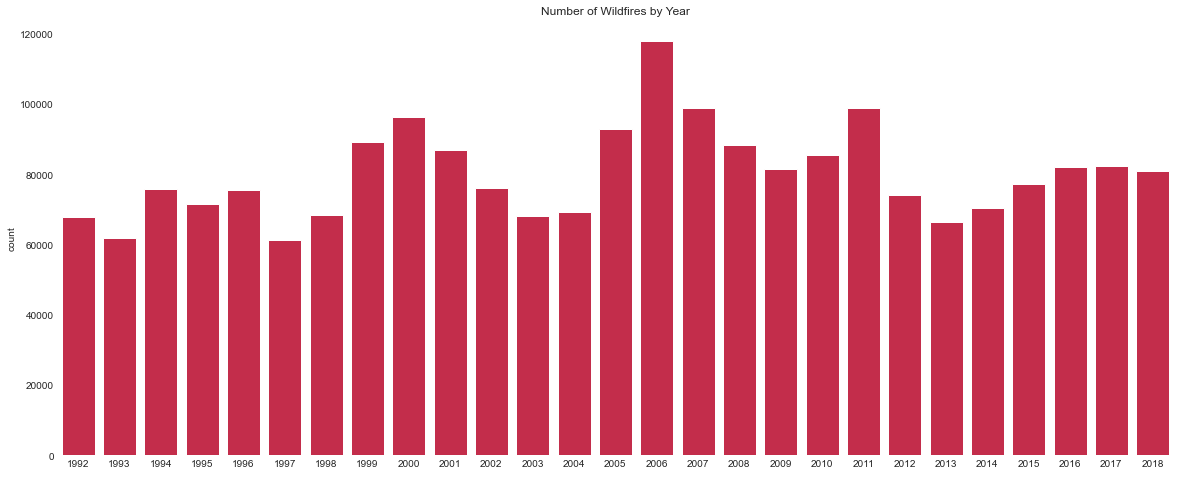

In [37]:
# plot counts by year
sns.countplot(data=df, x='fire_year', color='crimson')
plt.title('Number of Wildfires by Year')
plt.xlabel(' ');

### 2006, 2007, and 2011 had the most wildfires. There does almost appear to be a cycle of 5-6 years for the amount of wildfires.

In [25]:
# create dataframe of total count of fires by year
yearly_fire_count = df.groupby('fire_year').fire_size.count().reset_index().rename(columns={'fire_year':'year', 'fire_size':'fire_count'})
yearly_fire_count.head(2)

,year,fire_count
0,1992,67961
1,1993,61975


In [44]:
# round number of fires to the nearest thousand for plotting readability
yearly_fire_count.fire_count = round(yearly_fire_count.fire_count / 1_000)

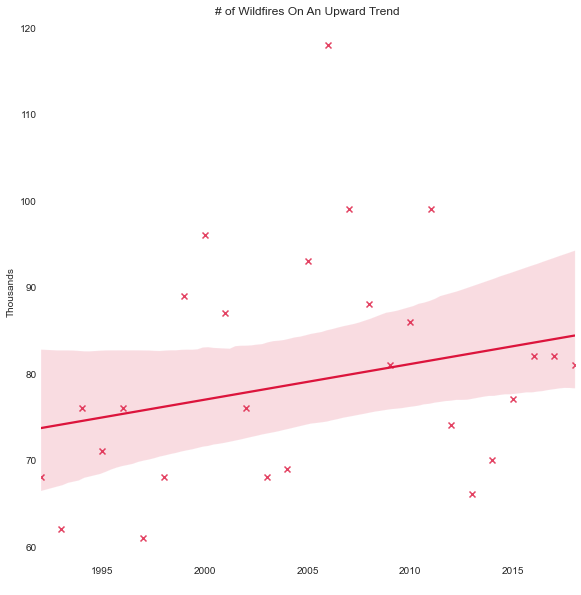

In [45]:
# plot trend of number of fires by year
sns.lmplot(x='year', y='fire_count', data=yearly_fire_count, height=8, markers='x', seed=321, robust=True, scatter_kws={'color': 'crimson'}, line_kws={'color': 'crimson'})
plt.ylabel('Thousands')
plt.xlabel(' ')
plt.title('# of Wildfires On An Upward Trend');

### There is a slight upward trend in the number of wildfires with an average of approximately 10k more wildfires in 2018 than there were in 1992.

## Let's see what the trend is when looking at large wildfires (>= 5k acres) vs small wildfires (< 5k acres)

In [28]:
# create df of small fire count by year
num_sm_fires_by_yr = df[df.fire_size_cat == 'small'].groupby('fire_year').fire_size.count().to_frame().rename(columns={'fire_size':'fire_count'})

# round count to nearest 1000 plotting readability
num_sm_fires_by_yr.fire_count = round(num_sm_fires_by_yr.fire_count / 1000)

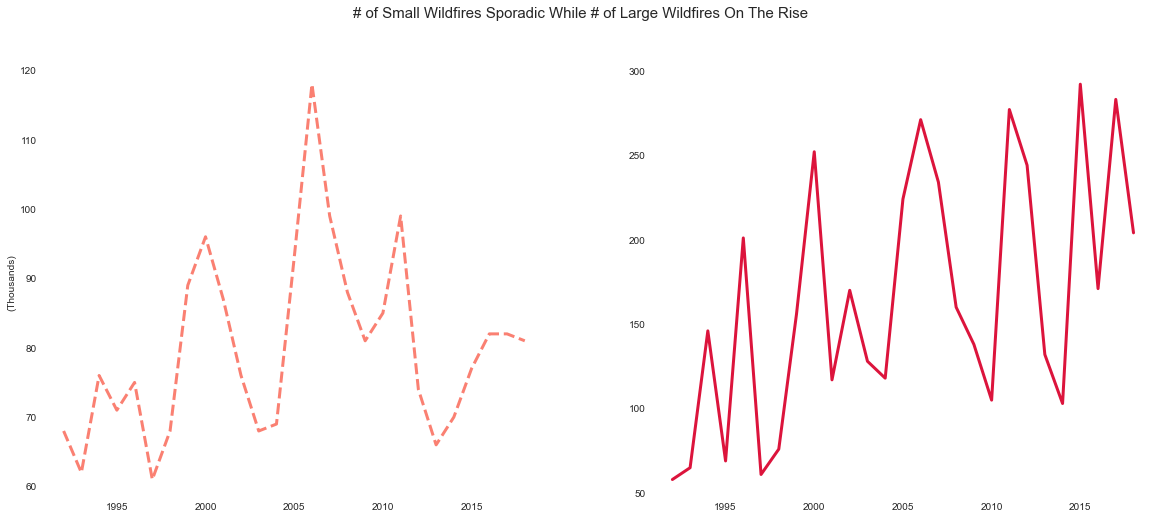

In [49]:
# plot trend of number of small and large fires over the years
# sns.set_style('white')

plt.figure(figsize = (20,8))
plt.suptitle('# of Small Wildfires Sporadic While # of Large Wildfires On The Rise', size=15)
plt.subplot(121)
plt.plot(num_sm_fires_by_yr, color='salmon', ls='--', lw=3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('(Thousands)')

plt.subplot(122)
df[df.fire_size_cat == 'large'].groupby('fire_year').fire_size.count().plot(color='crimson', lw=3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel(' ');

# Left off here

### Are wildfires more prevalent at certain times of year?

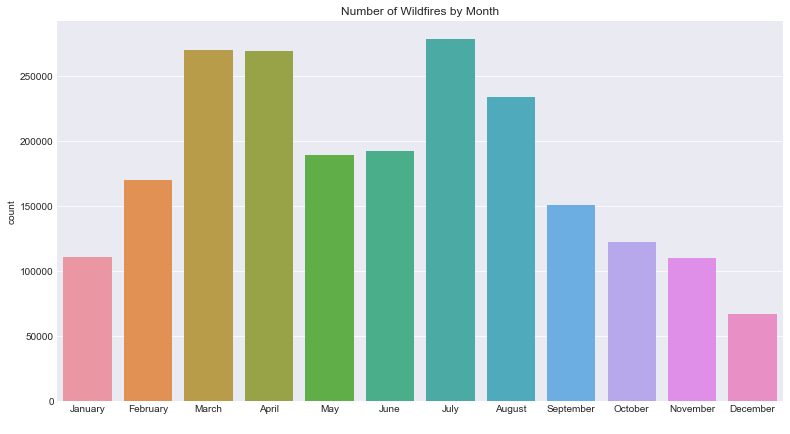

In [17]:
# plot counts by month
sns.countplot(data=df, x='month')
plt.title('Number of Wildfires by Month')
plt.xlabel(' ');

### Not surprisingly, July & August tend to have more fires which is likely due to heat, camping, and dry weather. It is surprising to see that March & April have a higher number of fires as well. I'm going to look further into that.

In [18]:
# check cause for wildfires in March & April
df[df.month.isin(['March', 'April'])].general_cause.value_counts()

Debris and open burning                       182322
Missing data/not specified/undetermined       137640
Arson/incendiarism                            104502
Equipment and vehicle use                      31503
Misuse of fire by a minor                      20544
Recreation and ceremony                        16478
Smoking                                        14994
Railroad operations and maintenance            10897
Natural                                        10585
Power generation/transmission/distribution      6753
Other causes                                    2331
Fireworks                                       1109
Firearms and explosives use                      167
Name: general_cause, dtype: int64

In [19]:
# check if there's certain states that are more prone to wildfires in March & April
df[df.month.isin(['March', 'April'])].state.value_counts().head(10)

GA    53133
NC    48069
NY    32296
SC    30085
TX    29412
MN    26676
MS    25618
FL    24927
AL    21943
OK    17276
Name: state, dtype: int64

### Hmm, there is nothing that really stands out. It is a little surprising that this happens in so many Eastern states as they usually do get a bit of rain and aren't known to be very dry and hot. There may be some open burning going on to prevent larger wildfires. This would be the best time of year to do so to prevent the fires from spreading quickly.

### How has the number of wildfires changed over the years?

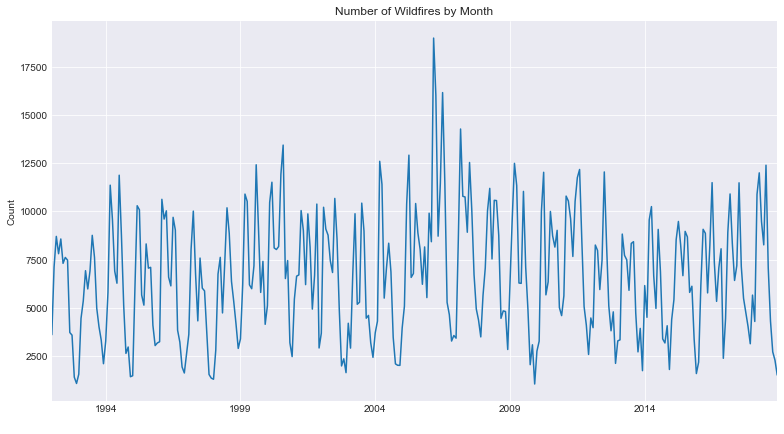

In [20]:
# plot trend of number of fires per month
df.resample('M').fire_year.count().plot()
plt.title('Number of Wildfires by Month')
plt.xlabel(' ')
plt.ylabel('Count');

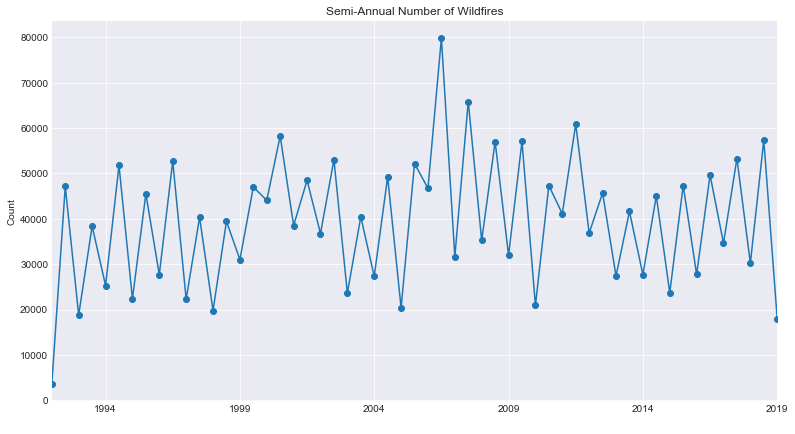

In [21]:
# plot trend of number of fires per 6 months
df.resample('6M').fire_year.count().plot(marker='o')
plt.title('Semi-Annual Number of Wildfires')
plt.xlabel(' ')
plt.ylabel('Count');

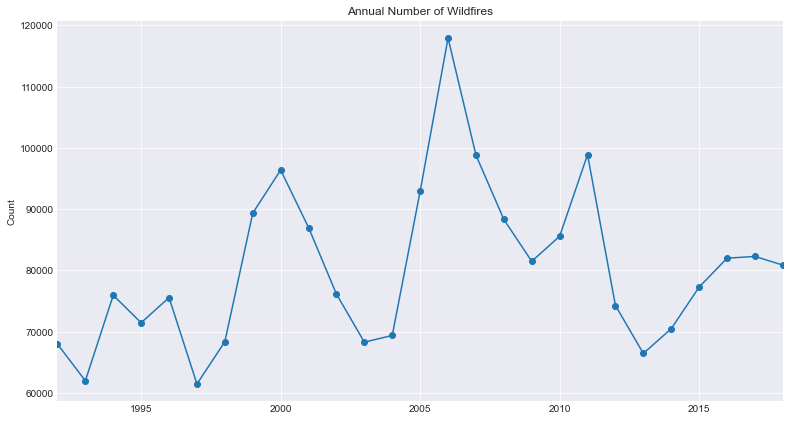

In [22]:
# plot trend of number of fires per year
df.resample('Y').fire_year.count().plot(marker='o')
plt.title('Annual Number of Wildfires')
plt.xlabel(' ')
plt.ylabel('Count');

### From these we can clearly see an uptick in the number of wildfires around the 2006 - 2007 time period but it's not entirely clear whether the average number of wildfires is on the rise.

In [23]:
# create dataframe of number of fires by year and 
yearly_fire_count = df.groupby('year').fire_size.count().reset_index()
yearly_fire_count.fire_size = round(yearly_fire_count.fire_size / 1_000)

KeyError: 'year'

### Get visualization of value counts by state

In [ ]:
# plot counts by state
plt.figure(figsize=(10,20))
sns.countplot(data=df, y='state', order=df.state.value_counts().index)
plt.title('Number of Wildfires by State');

In [ ]:
# find out what percentage of fires occur in each state
df.state.value_counts(normalize=True)

### What does the number of fires and size of fires look like by month?

In [ ]:
# resample by month and get count of wildfires by month
num_fires_by_month = df.resample('M').fire_year.count()
num_fires_by_month.head()

In [ ]:
# check number of rows
num_fires_by_month.shape

In [ ]:
# check which month and year combination had the most fires
num_fires_by_month.idxmax()

In [ ]:
# check how many fires happened that month
num_fires_by_month.max()

### March 2006 had the highest number of fires within the dataset with slightly over 19K fires occurring in that month.

In [ ]:
# plot monthly number of fires over the years
num_fires_by_month.plot()

In [ ]:
# plot number of fires over the years resampled by 6 months
num_fires_by_month.resample('6M').mean().plot(marker='o')

In [ ]:
# plot number of fires over the years resampled by a year
num_fires_by_month.resample('Y').mean().plot(marker='o')

In [ ]:
df.head()

In [ ]:
# resample by month and get summed size of wildfires by month
size_fires_by_month = df.resample('M').fire_size.sum()
size_fires_by_month.head()

In [ ]:
# check which month and year combination had the largest summed size of wildfires
size_fires_by_month.idxmax()

In [ ]:
# check total sum of fire sizes that month
size_fires_by_month.max()

### June 2015 had the largest area burned by wildfires within the dataset with slightly over 5.2M acres burned that month. 

In [ ]:
# plot monthly summed size of fires over the years
df.groupby('year').fire_size.sum().plot()

In [ ]:
# plot monthly average size of fires over the years
df.resample('M').fire_size.mean().plot()

In [ ]:
# plot yearly average size of fires over the years
df.resample('Y').fire_size.mean().plot()

In [ ]:
df.head()

In [ ]:
# create dataframe of total sum of fire_size by year
yearly_mean_fire_size = df.groupby('year').fire_size.sum().reset_index()

In [ ]:
yearly_mean_fire_size.fire_size = round((yearly_mean_fire_size.fire_size / 1_000_000), 2)
yearly_mean_fire_size

In [ ]:
# plot trend of fire size by year
sns.lmplot(x='year', y='fire_size', data=yearly_mean_fire_size, height=8, markers='x', seed=321, robust=True, scatter_kws={'color': 'crimson'}, line_kws={'color': 'crimson'})
sns.set(font_scale = 2)
plt.ylabel('Millions')
plt.xlabel(' ');

In [ ]:
# create dataframe of total sum of fire_size by year
yearly_fire_count = df.groupby('year').fire_size.count().reset_index()

In [ ]:
yearly_fire_count.fire_size = round(yearly_fire_count.fire_size / 1_000)
yearly_fire_count

In [ ]:
# plot trend of fire count by year
sns.set_style('white')

sns.lmplot(x='year', y='fire_size', data=yearly_fire_count, height=8, markers='x', seed=321, robust=True, scatter_kws={'color': 'crimson'}, line_kws={'color': 'crimson'})
plt.ylabel('Thousands', fontsize=18)
plt.xlabel(' ');

In [ ]:
sns.set_style('white')

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.plot(df2, color='salmon', ls='--', lw=3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('(Thousands)')

plt.subplot(122)
df[df.fire_size >= 5000].groupby('fire_year').fire_size.count().plot(color='crimson', lw=3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel(' ');

In [ ]:
num_sm_fires = df[df.fire_size < 5000].shape[0]
num_lg_fires = df[df.fire_size >= 5000].shape[0]
acres_sm_fires = df[df.fire_size < 5000].fire_size.sum()
acres_lg_fires = df[df.fire_size >= 5000].fire_size.sum()

In [ ]:
num_lg_fires

In [ ]:
print(num_lg_fires / df.shape[0])
print(1 - (num_lg_fires / df.shape[0]))

In [ ]:
acres_lg_fires / df.fire_size.sum()

### While accounting for only .02% of the number of wildfires, large fires (those greater than 5,000 acres) account for about 74% of all acreage burned

In [ ]:
df.head()

In [ ]:
df.groupby('year').count()

In [ ]:
labels=['Small Fires', 'Large Fires']
colors = ['tomato', 'crimson']

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.pie(x = [num_sm_fires, num_lg_fires], colors = colors, textprops = {'size':14}, explode=(0,.05), shadow=True)
plt.title('Number of Large Fires vs Small Fires', size=15)

plt.subplot(122)
plt.pie(x = [acres_sm_fires, acres_lg_fires], colors = colors, textprops = {'size':14}, shadow=True)
plt.title('Acres Burned By Large Fires vs Small Fires', size=15)
plt.figlegend(labels, fontsize =15)
plt.show()

In [ ]:
labels=['Small Fires', 'Large Fires']

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.pie(x = [num_sm_fires, num_lg_fires], colors = ['salmon', 'crimson'], textprops = {'size':14}, explode=(0,.05))
plt.figlegend(labels, fontsize =15)
plt.title('Number of Large Fires vs Small Fires', size=15)

plt.subplot(122)
plt.pie(x = [acres_sm_fires, acres_lg_fires], colors = ['salmon', 'crimson'], textprops = {'size':14})
plt.title('Acres Burned By Large Fires vs Small Fires', size=15)
plt.show()

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.bar(x = ['num_sm_fires', 'num_lg_fires'], height=[num_sm_fires, num_lg_fires])
plt.title('Number of Large Fires vs Small Fires', size=15)

plt.subplot(122)
plt.bar(x = ['acres_sm_fires', 'acres_lg_fires'], height=[acres_sm_fires, acres_lg_fires])
plt.title('Acres Burned By Large Fires vs Small Fires', size=15)
plt.show()

### When resampling by year, there is not a clear trend in the *number* of wildfires however, we do see that the average *size* of wildfires is on an upward trend

In [ ]:
df.head()

In [ ]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

In [ ]:
df[df.fire_size > 100]

In [ ]:
df.head()

In [ ]:
top_five_wildfire_states = df.state.value_counts().head(5).index.to_list()
top_five_wildfire_states

In [ ]:
num_fires_by_year = df[df.state.isin(top_five_wildfire_states)]\
.groupby(['year', 'state']).count().reset_index()\
.iloc[:, 0:3].rename(columns={'fire_year':'num_fires'})
num_fires_by_year

In [ ]:

sns.lineplot(data=num_fires_by_year, x='year', y='num_fires', hue='state')

In [ ]:

top_causes_of_wildfires = df.general_cause.value_counts().head()
top_causes_of_wildfires

In [ ]:
top_causes_of_wildfires[1:].index.to_list()

In [ ]:
# create a new dataframe that groups by year and gets a count by year of the top causes for wildfires
num_causes_by_year = df[df.general_cause.isin(top_causes_of_wildfires[1:].index.to_list())]\
.groupby(['year', 'general_cause']).count().reset_index().iloc[:, 0:3]\
.rename(columns={'fire_year':'num_occurrences'})
num_causes_by_year

In [ ]:
# plot trends over the years by the top four causes of wildfires, excluding observations where cause was not specified
sns.lineplot(data=num_causes_by_year, x='year', y='num_occurrences', hue='general_cause')

In [ ]:
num_causes_by_year.head()

In [ ]:
num_causes_by_year.to_csv('num_causes_by_year')

In [ ]:
num_causes_by_year.shape

In [ ]:
natural = num_causes_by_year[num_causes_by_year.general_cause == "Natural"]
arson = num_causes_by_year[num_causes_by_year.general_cause == "Arson/incendiarism"]
debris = num_causes_by_year[num_causes_by_year.general_cause == "Debris and open burning"]
equipment = num_causes_by_year[num_causes_by_year.general_cause == "Equipment and vehicle use"]

natural = natural.set_index("year")
arson = arson.set_index("year")
equipment = equipment.set_index("year")
debris = debris.set_index("year")

fig, ax = plt.subplots()
labels = arson.index

ax.bar(labels, arson.num_occurrences, label="Arson/incendiarism")
ax.bar(labels, natural.num_occurrences, label="Natural Causes", bottom=arson.num_occurrences)
ax.bar(labels, debris.num_occurrences, label="Debris & Open Burning", bottom=natural.num_occurrences + arson.num_occurrences)
ax.bar(labels, equipment.num_occurrences, label="Equipment & Vehicle Use", bottom=debris.num_occurrences + natural.num_occurrences + arson.num_occurrences)

ax.legend()
ax.set_ylabel("n occurrences")
ax.set_title("Top Causes Of Wildfires Across The U.S.")

In [ ]:
# plot wildfires caused by natural causes by year
sns.countplot(data=df[df.general_cause == 'Natural'], y='year')

### In recent years, we have seen a decrease in number of wildfires that were caused by natural causes

In [ ]:
# plot wildfires caused by Debris and open burning by year
sns.countplot(data=df[df.general_cause == 'Debris and open burning'], y='year')

### There appears to be a slight upward trend in debris and open burning as a cause of wildfires

In [ ]:
# plot wildfires caused by Arson/incendiarism by year
sns.countplot(data=df[df.general_cause == 'Arson/incendiarism'], y='year')

### There are some spikes but otherwise a downward trend in arson/incendiarism as a cause for wildfires

In [ ]:
# plot wildfires caused by Equipment and vehicle use by year
sns.countplot(data=df[df.general_cause == 'Equipment and vehicle use'], y='year')

### There are no obvious trends or anything that really stands out in this plot for equipment and vehicle use as a cause for wildfires. 

### There's no one cause for the higher number of fires in 2006. All causes have higher numbers for this year.

In [ ]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

### I want to get a better understanding of range of wildfire sizes

In [ ]:
print(f'The 10th percentile is: {df.fire_size.quantile(.1)}')
print(f'The 20th percentile is: {df.fire_size.quantile(.2)}')
print(f'The 25th percentile is: {df.fire_size.quantile(.25)}')
print(f'The 30th percentile is: {df.fire_size.quantile(.3)}')
print(f'The 40th percentile is: {df.fire_size.quantile(.4)}')
print(f'The 50th percentile is: {df.fire_size.quantile(.5)}')
print(f'The 60th percentile is: {df.fire_size.quantile(.6)}')
print(f'The 70th percentile is: {df.fire_size.quantile(.7)}')
print(f'The 75th percentile is: {df.fire_size.quantile(.75)}')
print(f'The 80th percentile is: {df.fire_size.quantile(.8)}')
print(f'The 90th percentile is: {df.fire_size.quantile(.9)}')
print(f'The 100th percentile is: {df.fire_size.quantile(1)}')

In [ ]:
df.fire_size.hist()

In [ ]:
df[df.fire_size > 100000].shape

In [ ]:
# check 
df[df.fire_size > 100000].fire_size.hist()

In [ ]:
# plot counts of large fires by year
sns.countplot(data=df[df.fire_size > 100000], x='year')

### I want to graph the average size of wildfires per decade to see if I can clearly represent the trend to our audience.

In [ ]:
# create another column categorizing decade
conditions = [df.year < 2000, df.year <2010, df.year <2020]
choices = ['1992 - 1999', '2000 - 2009', '2010 - ']
df['decade'] = np.select(conditions, choices)
df.head()

In [ ]:
# plot average fire size by decade
sns.barplot(data=df, x='decade', y='fire_size', hue='fire_size_cat')

### I am also going to try to graph average fire size per quinquennial between 1995-2015 to see if that also represents this trend

In [ ]:
# create another dataframe where I can chunk the data into 5-year periods
df2 = df[(df.year >=1996) & (df.year <=2015)]
df2.year.value_counts().sort_index()

In [ ]:
# create another column categorizing quinquennial
conditions = [df2.year <= 2000, df2.year <= 2005, df2.year <= 2010, df2.year <= 2015]
choices = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
df2['quinquennial'] = np.select(conditions, choices)
df2.head()

In [ ]:
# plot average fire size by quinquennial
sns.barplot(data=df2, x='quinquennial', y='fire_size')

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.countplot(data=df2[df2.fire_size_cat == 'large'], x='quinquennial')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('# of Small Fires')
# plt.xlabel('Year')

plt.subplot(122)
sns.countplot(data=df2[df2.fire_size_cat == 'small'], x='quinquennial')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('# of Large Fires')
# plt.xlabel('Year');

In [ ]:
# create another column categorizing quinquennial
conditions = [df.year <= 1994, df.year <= 1997, df.year <= 2000, df.year <= 2003, df.year <= 2006, df.year <= 2009, df.year <= 2012, df.year <= 2015, df.year <= 2018]
choices = ['94', '97', '00', '03', '06', '09', '12', '15', '18']
df['triennial'] = np.select(conditions, choices)
df.head()

In [ ]:
# create another column categorizing quinquennial
conditions = [df.year <= 2000, df.year <= 2009, df.year <= 2018]
choices = ['1992 - ', '97', '00']
df['nine_years'] = np.select(conditions, choices)
df.head()

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.countplot(data=df[df.fire_size_cat == 'small'], x='nine_years')
# plt.ylabel('# of Large Fires')
# plt.xlabel('Year');

plt.subplot(122)
sns.countplot(data=df[df.fire_size_cat == 'large'], x='nine_years')
# plt.ylabel('# of Small Fires')
# plt.xlabel('Year')

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.countplot(data=df[df.fire_size_cat == 'large'], x='triennial')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('# of Small Fires')
# plt.xlabel('Year')

plt.subplot(122)
sns.countplot(data=df[df.fire_size_cat == 'small'], x='triennial')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('# of Large Fires')
# plt.xlabel('Year');

In [ ]:
df2.quinquennial.value_counts()

In [ ]:
# US fire size category total fire size, over time
# group by fire_size_cat, sum fire_size, show year
sizes = df2.groupby(['fire_size_cat', 'quinquennial']).fire_size.sum()
sizes

In [ ]:
sizes = df2.groupby(['quinquennial', 'fire_size_cat']).fire_size.sum().to_frame().reset_index()
sizes

In [ ]:
size = sizes.pivot(index='quinquennial', columns='fire_size_cat').reset_index()
size

In [ ]:
# size = sizes.reset_index().pivot(index='quinquennial', columns='fire_size_cat').reset_index()
# size

In [ ]:
size.columns

In [ ]:
size.columns = ['quinquennial', 'large', 'small']

In [ ]:
size.head()

In [ ]:
size['lg_normalized'] = size.large / (size.large + size.small)
size['sm_normalized'] = 1 - (size.large / (size.large + size.small))
size

In [ ]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,8))

labels = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
# plot the number of occurrences for each cause by year
ax.bar(labels, size.sm_normalized, label="Small Fires")
ax.bar(labels, size.lg_normalized, label="Large Fires", bottom = size.sm_normalized)

ax.legend()
ax.set_ylabel("% Area Burned")
ax.set_title("% of Area Burned by Large Fires vs Small Fires", fontdict={'fontsize': 24});

In [ ]:
sizes.fire_size

In [ ]:
# separate large and small wildfires into their own dataframe
small = sizes[sizes.fire_size_cat == 'small']
large = sizes[sizes.fire_size_cat == 'large']

In [ ]:
large.head()

In [ ]:
small.quinquennial.unique()

In [ ]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,8))

labels = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
# plot the number of occurrences for each cause by year
ax.bar(labels, large.fire_size, label="Large Fires")
ax.bar(labels, small.fire_size, label="Small Fires", bottom=large.fire_size)

ax.legend()
ax.set_ylabel("fire size");

In [ ]:
counts = df2.groupby(['quinquennial', 'fire_size_cat']).fire_size.count().to_frame().reset_index()
counts

In [ ]:
counts = counts.pivot(index='quinquennial', columns='fire_size_cat').reset_index()
counts

In [ ]:
counts.columns = ['quinquennial', 'large', 'small']
counts

In [ ]:
counts['lg_normalized'] = counts.large / (counts.large + counts.small)
counts['sm_normalized'] = 1 - (counts.large / (counts.large + counts.small))
counts

In [ ]:
# create the subplots
fig, ax = plt.subplots(figsize = (20,12))

labels = ['1996 - 2000', '2001 - 2005', '2006 - 2010', '2011 - 2015']
# plot the number of occurrences for each cause by year

ax.bar(labels, counts.large, label="Large Fires", log=True)
ax.bar(labels, counts.small, label="Small Fires", bottom = counts.large, log=True)

ax.legend()
ax.set_ylabel("% Area Burned")
ax.set_title("% of Area Burned by Large Fires vs Small Fires", fontdict={'fontsize': 24});

In [ ]:
yearly_mean_fire_size = df.groupby('year').fire_size.mean().reset_index()

In [ ]:
# # plot scatterplot with regression line
# # sns.color_palette("rocket", as_cmap=True)
# sns.lmplot(x='year', y='fire_size', data=yearly_mean_fire_size, height=8, markers='x', seed=321, robust=True)
# plt.title('Annual Average Acres Burned Is Increasing', size=14, color_palette='rocket')
# plt.xlabel('Year')
# plt.ylabel('Acres Burned');

In [ ]:
df.groupby('year').mean()

The smallest wildfire is only about 4.5 square feet

25% of fires are less than 1/10 of an acre

50% are less than one acre

75% are less than three acres

20% of fires are greater than 5 acres which is equivalent to three and a quarter football fields.

The largest wildfire is larger than 500,000 football fields or 85% of Rhode Island, our smallest state

---

#### I am going to create a column categorizing the fires as:

* small: up to the size of two tennis courts
* medium: up to the size of a football field
* large: up to the size of 4 football fields
* extra_lg: anything larger than this

In [ ]:
# create another column categorizing fire size
conditions = [df.fire_size <=.13, df.fire_size <=1.3, df.fire_size <=5.2, df.fire_size >5.2]
choices = ['small', 'medium', 'large', 'extra_lg']
df['size_category'] = np.select(conditions, choices)
df.head()

In [ ]:
df.size_category.value_counts(normalize=True)

In [ ]:
# plot size of fires by latitude and longitude
sns.scatterplot(x='longitude', y='latitude', hue='size_category', data=df)

### With all the fires plotted across all the years, we see that the large majority seems to be smaller fires. Alaska does have a large amount of extra-large fires

In [ ]:
# checking to see what the fire size and location looks like for 2006
sns.scatterplot(x='longitude', y='latitude', hue='size_category', data=df[df.year == 2006])

### It appears that the majority of the largest wildfires in 2006 happened in the central area of the US

In [ ]:
df.head()

In [ ]:
df.groupby('state').fire_size.sum().sort_values(ascending=False).head()

In [ ]:
y = df.groupby('state').fire_size.sum().sort_values(ascending=False).head(10).reset_index()
y.fire_size = round(y.fire_size/1_000_000)
y

In [ ]:
sns.barplot(x='state', y='fire_size', data=y)

In [ ]:
df[df.state == 'AK'].fire_size.sum()

### I am going to further explore extra-large fires to see if there's anything there.

In [ ]:
lg_df = df[df.size_category == 'extra_lg']
lg_df.info()

In [ ]:

lg_df.fire_size.describe()

In [ ]:
lg_df.general_cause.value_counts()

In [ ]:
x = df[df.fire_size > 9]
x.general_cause.value_counts()

In [ ]:

df[df.general_cause == 'Debris and open burning'].fire_size.describe()

In [ ]:

df[df.general_cause == 'Debris and open burning'].fire_size.hist()

In [ ]:

df[(df.general_cause == 'Debris and open burning') & (df.fire_size > 50_000)].info()

In [ ]:

df[df.general_cause == 'Natural'].fire_size.describe()

In [ ]:

df[df.general_cause == 'Natural'].fire_size.hist()

In [ ]:
df[(df.general_cause == 'Natural') & (df.fire_size > 50_000)].info()

In [ ]:

df[df.general_cause == 'Arson/incendiarism'].fire_size.describe()

In [ ]:
df[df.general_cause == 'Arson/incendiarism'].fire_size.hist()

In [ ]:

df[(df.general_cause == 'Arson/incendiarism') & (df.fire_size > 50_000)].info()

### Below is a list of states with the most and fewest amount of fires for each year in our dataset. Washington DC is most often the place with the fewest fires per year. Apart from DC, the states with the fewest fires per year include New England states such as Maryland, Vermont, Delaware, and Massachusetts; Puerto Rico had the fewest fires in 1996. California, Georgia, and Texas are the states with the greatest number of fires for every year except for 2018, during which Arizona had 9,738 fires.

In [ ]:
# # Sophia
# # print max and min for num fires/year
# for year in list(range(1992, 2019)):
#     print(year)
#     print('Fewest fires:', df[df.fire_year == year].groupby('state').fire_size.count().idxmin(), df[df.fire_year == year].groupby('state').fire_size.count().min())
#     print('Most fires:',df[df.fire_year == year].groupby('state').fire_size.count().idxmax(), df[df.fire_year == year].groupby('state').fire_size.count().max())
#     print() b

### A teammate discovered that the annual number of wildfires for TX  that we had in our database almost doubled for each year for the period 2005 and after vs 1992 - 2004. I am going to do a little exploring to see if I can discover why there's such a difference.

In [ ]:
# create separate dataframes for each period
texas_92 = df[(df.state == 'TX') & (df.fire_year < 2005)]
texas_05 = df[(df.state == 'TX') & (df.fire_year >= 2005)]
texas_05.head()

In [ ]:
# plot counts by year for period prior to 2005
sns.countplot(data=texas_92, x='year')

In [ ]:
# plot counts by year for period 2005 and after
sns.countplot(data=texas_05, x='year')

### If we look at the numbers on the y-axis, the year with the most fires, 1996, in period pre-2005 is less than the year with the least fires 2007, in period 2005 and after. This is a huge jump and slightly suspicious. Climate change is causing an increase in wildfires but not with that much of a difference from one year to the next.

In [ ]:
# check value counts for cause and normalize
texas_92.general_cause.value_counts(normalize=True)

In [ ]:
# check value counts for cause and normalize
texas_05.general_cause.value_counts(normalize=True)

Debris and open burning as a cause is down 6%

Missing data as a cause is up 100%

Equipment and vehicle use as a cause is up 7%

### There's nothing here that stands out as the reason for more fires. The significant increase in missing data makes me wonder if there may just have been a change in recording wildfires.

In [ ]:
# check stats for wildfire size to see if there's a difference
texas_92.fire_size.describe()

In [ ]:
# check stats for wildfire size to see if there's a difference
texas_05.fire_size.describe()

### The fact that there are many more smaller fires reaffirms my suspicions. It could be that prior to 2005 many of the smaller fires that were quicky contained were not documented and 2005 was when they started being more comprehensive in their documentation of fires. 

In [ ]:
df[(df.state == 'TX') & (df.fire_year == 2004)].general_cause.value_counts(normalize=True)

In [ ]:
df[(df.state == 'TX') & (df.fire_year == 2005)].general_cause.value_counts(normalize=True)

In [ ]:
df[(df.state == 'TX') & (df.fire_year == 2004)].fire_size.describe()

In [ ]:
df[(df.state == 'TX') & (df.fire_year == 2005)].fire_size.describe()